In [1]:
!pip install /kaggle/input/ml-models/package/dist/mlmodels-1.0-py2.py3-none-any.whl

Processing /kaggle/input/ml-models/package/dist/mlmodels-1.0-py2.py3-none-any.whl


In [2]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid',font_scale=0.8)
from mlmodels.gpr_bclassifier import GPRC
%matplotlib inline

![](https://i.imgur.com/9GsUtSc.jpg)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#E888BB'> 1.1 |</span> Problem Overview </b>

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>PROBLEM STATEMENT</span></b></p></div>

- World Health Organization (WHO) has estimated 12 million deaths occur worldwide, every year due to heart diseases
- Half the deaths in the United States and other developed countries are due to cardio vascular related diseases
- Early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients, and in turn reduce the complications
- In this study we explore the risk factors of heart disease, as well as create models for predicting if patients are prone to this disease

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>NOTEBOOK COVERS</span></b></p></div>

- A binary <b>classification</b> problem, using the <b>UCI Dataset</b>. 
- Exploratory Data Analysis (EDA) using <b>correlation</b> & <b>bivariate tables</b> & a <b>multivariate pairgrid</b>.
- A simple <b>Gaussian Process Regressor</b> turned <b>classifier</b> is used for our model. 
- The <b>sklearn compatible class</b> is that incorporates a <b>simple ensemble weighting</b> in the prediction function.
- The <b>custom model class</b> will also be used with sklearn's <b>Pipeline</b> & <b>GridSearchCV</b> classes.



<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>NOTEBOOK AIM</span></b></p></div>

- The goal of the problem is to predict the target variable, called <b>condition</b>. 
- It has only two unique associated values, so let's treat this a <b>binary classification problem</b>.

<br>

### <b><span style='color:#E888BB'> 1.2 |</span> Feature Desciption </b>

**Feature List:**
`age`
`sex`
`cp`
`trestbps`
`chol`
`fbs`
`restecg`
`thalach`
`exang`
`oldpeak`
`slope`
`ca`
`thal`
`condition` <br>
**Feature Types:** All features are `numerical features`, however some of them are converted `categorical features`, we'll know which is which when looking into EDA.

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>FEATURES</span></b></p></div>

<b>1. age |</b> Number of years a person has lived <br>
<b>2. sex |</b> Gender of patient (Male:1/Female:0)  <br>
<b>3. cp | </b> Chest Pain type (4 values) <br>
<b>4. trestbps |</b> Resting Blood Pressure <br>
<b>5. chol |</b> serum cholestoral in mg/dl <br>
<b>6. fbs |</b> Fasting Blood Sugar > 120 mg/dl <br>
<b>7. restecg |</b> Resting Electrocardiographic (ECG) results (values 0,1,2) <br>
<b>8. thalach |</b> Maximum Heart Rate Achieved <br>
<b>9. exang |</b> Exercise Induced Angina <br>
<b>10. oldpeak |</b> oldpeak = ST depression induced by exercise relative to rest <br>
<b>11. slope |</b> the slope of the peak exercise ST segment <br>
<b>12. ca |</b> number of major vessels (0-3) colored by flourosopy <br>
<b>13. thal |</b> Thalium stress test results: 3 = normal; 6 = fixed defect; 7 = reversable defect 

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>TARGET VARIABLE</span></b></p></div>

<b>Target Variable</b>, from [original dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)<br>
condition: diagnosis of heart disease (angiographic disease status)<br>
<b>Value 0:</b> < 50% diameter narrowing (negative for disease) <br>
<b>Value 1:</b> > 50% diameter narrowing (positive for disease)
</div><br>

### <b><span style='color:#E888BB'> 1.3 |</span> In-Depth Feature Description </b>

Some interesting excerts are placed in this section

**ECG Related Features** : `restecg`,`oldpeak`,`slope`

#### **<span style='color:#E888BB'>restecg</span>**
> Resting electrocardiography (ECG) is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. [Reference](https://www.ncbi.nlm.nih.gov/books/NBK367910/)

`0: normal`,`1: having ST-T wave abnormality`,`2:showing probable or definite left ventricular hypertrophy by Estes' criteria`

**Blood Related Features** : `trestbps`,`thalach`,`fbs`,`chol`
    
#### **<span style='color:#E888BB'>trestbps: Resting Blood Pressure</span>**
> Stress on the blood vessels makes people with hypertension more prone to heart disease, peripheral vascular disease, heart attack, stroke, kidney disease and aneurysms. Correspondingly, chronic conditions such as diabetes, kidney disease, sleep apnea and high cholesterol increase the risk for developing high blood pressure. [Reference](https://www.rush.edu/health-wellness/discover-health/6-high-blood-pressure-facts)

#### **<span style='color:#E888BB'>thalach: Maximum Heart Rate</span>**
> It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg. [Reference](https://pubmed.ncbi.nlm.nih.gov/19615487/#:~:text=It%20has%20been%20shown%20that,pressure%20by%2010%20mm%20Hg.)

#### **<span style='color:#E888BB'>fbs: Fasting Blood Sugar</span>**
> A test that measures blood sugar levels. Elevated levels are associated with diabetes and insulin resistance, in which the body cannot properly handle sugar (e.g. obesity). [Reference](https://my.clevelandclinic.org/health/diagnostics/16790-blood-sugar-tests)

#### **<span style='color:#E888BB'>chol: serum cholestoral</span>**
> The conventional view is that having high LDL cholesterol levels increases your risk of dying of cardiovascular diseases, such as heart disease. [Reference](https://www.nhs.uk/news/heart-and-lungs/study-says-theres-no-link-between-cholesterol-and-heart-disease/)
</div><br>


**Pain & Defect Related Features** : `cp`,`exang`,`thal`,`ca`

#### **<span style='color:#E888BB'>exang:  Exercise Induced Angina</span>**
> Angina is chest pain caused by reduced blood flow to the heart muscles. It's not usually life threatening, but it's a warning sign that you could be at risk of a heart attack or stroke. [Reference](https://www.nhs.uk/conditions/angina/)

#### **<span style='color:#E888BB'>ca: number of major vessels (0-3) colored by flourosopy</span>**
> However, number of major vessels colored by fluoroscopy had a medium effect on the CAD diagnosis that could be due to the small sample size of the study population. It might be related to the fact that the sensitivity of fluoroscopy could be as low as 35% in some cases,[86] and the system learned it from the training set.
[Reference](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/)
<br>

### <b><span style='color:#E888BB'> 1.4 |</span> Model Selection </b>

- For this problem, we will need a model which has the ability to classify. It's possibly to use a `regression` model, and add a few lines of code which changes the `regressor` prediction to the nearest class. The `regressor` format is used to utilise `ensemble` model weighting, which often is said to improve predictions. 
- Let's use the `Gaussian Process` Regressor, introduced in a [previous notebook](https://www.kaggle.com/shtrausslearning/gaussian-processes-airfoil-noise-modeling) & add a simple `classifier` that finds nearest unique class associated to the `posterior mean` prediction.
- The model doesn't incorporate `probability` prediction, so `ROC` & `PR` curves, which are generally useful, but aren't looked at. 
- Instead the model is used with `GridSearchCV` & manual model parameter (`hyperparameters`) selection to prevent severe overfitting

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>2 |</span></b> <b>EXPLORATORY DATA ANALYSIS</b></div>

- The dataset contains quite a lot of features to choose from for building our model(s) but we first need to investigate the dataset. 
- The feature dataset can be rougtly divided into `general patient`,`ECG`,`blood`,`pain` related features.

### <b><span style='color:#E888BB'> 2.1 |</span> Loading Data </b>

Let's load the dataset into the variable `df`

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

### <b><span style='color:#E888BB'> 2.2 |</span> Quick Dataset Inspection </b>
- Let's look at some commonly looked at things, when first looking through the dataset
- Lets check if we have missing data, as well as the datatypes of our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Let's check the statistics of our numerical data 

In [6]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Let's take a look at the distribution for our target variable

In [7]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

#### **<span style='color:#E888BB'>FIRST IMPRESSION SUMMARY</span>**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li><b>info</b> method suggests we have a full dataset, with no missing values</li>
    <li><b>head</b> method suggests that our target variable has already been converted to a <b>categorical</b> feature</li>
    <li><b>value_count</b> method suggest out binary classifcation problem is well balanced & a metric like <b>accuracy</b> is quite approapriate here 
    <li>We can note that dataset is quite entry level friendly, very little preprocessing is required to move on the the modelling phase</li>

</ul>
</div>

### <b><span style='color:#E888BB'> 2.3 |</span> Correlation matrix </b>

We have a lot of features, let's investigate the `linear correlation` of these features, they are all formally numerical, all `categorical` features are already converted for us.

In [8]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(10,5))
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')

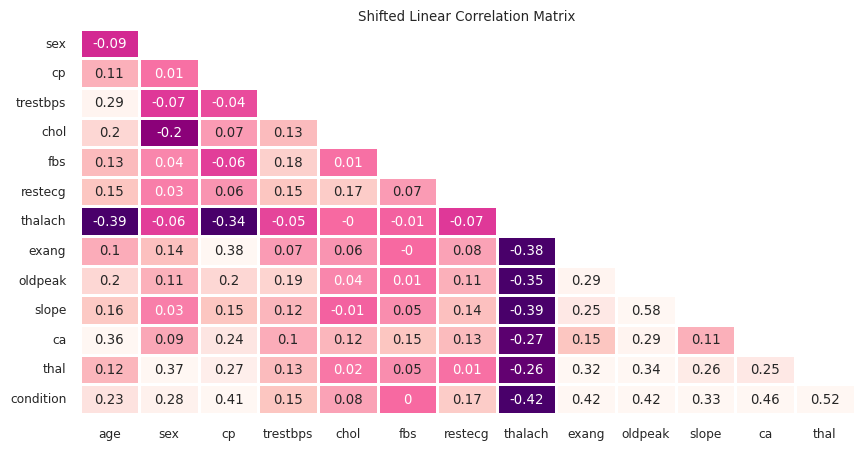

In [9]:
corrMat(df)

#### **<span style='color:#E888BB'>CORRELATION MATRIX SUMMARY</span>**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
<li>Amongst the higher positively correlated features; <b>thal</b>,<b>ca</b>,<b>oldpeak</b>,<b>exang</b>,<b>cp</b>; (0.52,0.46,0.42,0.41)</li>
<li>Only one feature is negatively correlated to the target variable; <b>thalach</b> (-0.42)</li>
<li>The only feature that has little to no linear correlation to target variable:<b>fbs</b> (0.0)</li>
</ul>
</div>

In [10]:
''' CountPlot Histograms '''

plt4 = ['#E379B2','#6351BB']
def plot1count(x,xlabel,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition', data=df, palette=palt)
    plt.legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
    
def plot1count_ordered(x,xlabel,order,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition',data=df,order=order,palette=palt)
    plt.legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

def plot2count(x1,x2,xlabel1,xlabel2,colour,rat,ind1=None,ind2=None):
    
    # colour, ratio, index_sort

    fig,ax = plt.subplots(1,2,figsize=(20,3),gridspec_kw={'width_ratios':rat})
    # Number of major vessels (0-3) colored by flourosopy
    sns.countplot(x=x1,hue='condition',data=df,order=ind1,palette=colour,ax=ax[0])
    ax[0].legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
    ax[0].set_xlabel(xlabel1)
    ax[0].set_ylabel('Frequency')

    # Defect Information (0 = normal; 1 = fixed defect; 2 = reversable defect )
    sns.countplot(x=x2,hue='condition', data=df,order=ind2,palette=colour,ax=ax[1])
    ax[1].legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='best')
    ax[1].set_xlabel(xlabel2)
    ax[1].set_ylabel('Frequency')
    plt.show()
    
''' Plot n Countplots side by side '''
def nplot2count(lst_name,lst_label,colour,n_plots):
    
    ii=-1;fig,ax = plt.subplots(1,n_plots,figsize=(20,3))
    for i in range(0,n_plots):
        ii+=1;id1=lst_name[ii];id2=lst_label[ii]
        sns.countplot(x=id1,hue='condition',data=df,palette=colour,ax=ax[ii])
        ax[ii].legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
        ax[ii].set_xlabel(id2)
        ax[ii].set_ylabel('Frequency')

### <b><span style='color:#E888BB'> 2.4 |</span> Bivariate Histograms </b>

Bivariate histograms are split into several categories of similar similarity `General patient`,`ECG`,`Blood`,`Pain` related features, hue for both `condition` is compared.

#### **<span style='color:#E888BB'>GENERAL FEATURE & PAIN RELATED FEATURES</span>**

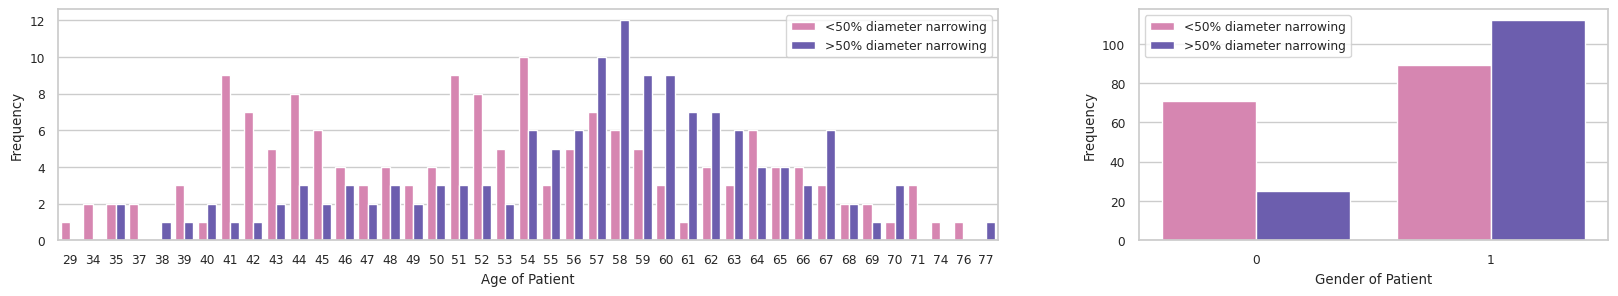

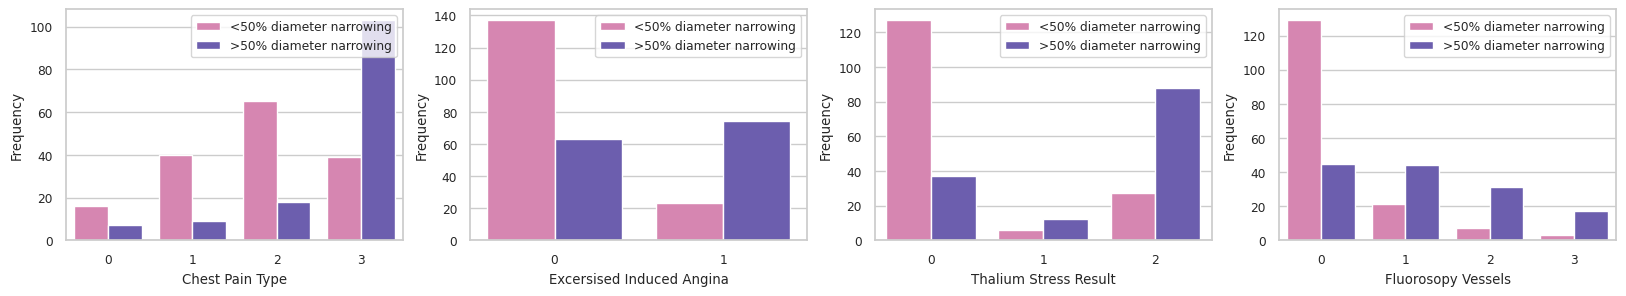

In [11]:
plot2count('age','sex','Age of Patient','Gender of Patient',plt4,[2,1])
lst1 = ['cp','exang','thal','ca']
lst2 = ['Chest Pain Type','Excersised Induced Angina','Thalium Stress Result','Fluorosopy Vessels']
nplot2count(lst1,lst2,plt4,4)

**Age & Sex; Linear Correlation (0.23,0.28)** <br>
Age group between [29,54]; increase in frequency for a `<50%` cases `target` value. <br>
Age group between [55,63]; distinctly larger proportion of `>50%`<br>
Aside from a couple of patients in the age group 71 to 76, `>50%` is much more populated for the higher age group, therefore identifying them are the higher risk patients<br>
`Sex` Distribution suggests; `male` are more likely to have an association with `>50%` <br> 
`women` patient also had much more even distribution of `>50%` & `<50%` cases, compared to `male`.

**Chest Pain Type; Linear Correlation (-0.41)**<br>
`>50%` patients actually are associated with no chest pain symptoms as is seen in the data.

**Excercise Induced Angina; Linear Correlation (0.42)** <br>
Higher values of `exang` are associated with higher values of `condition` (`>50%`) <br>

**Major Coloured Vessels; Linear Correlation (0.46)** <br>
Higher values of coloured `major vessels` are associated with target variabe `>50%` <br>

<br>

#### **<span style='color:#E888BB'>ECG RELATED FEATURES</span>**

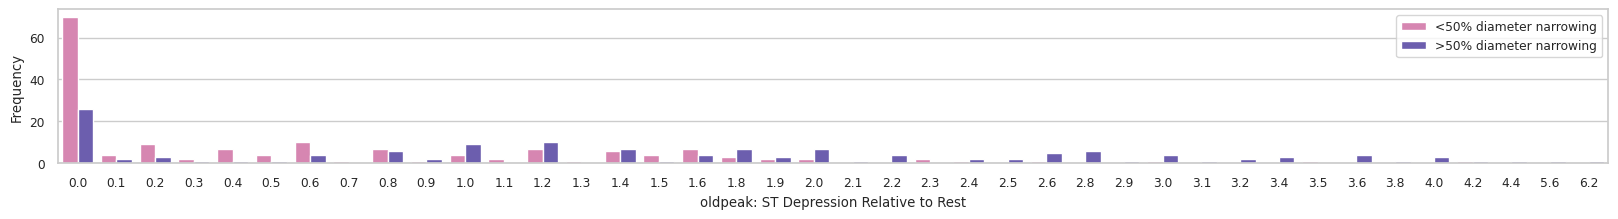

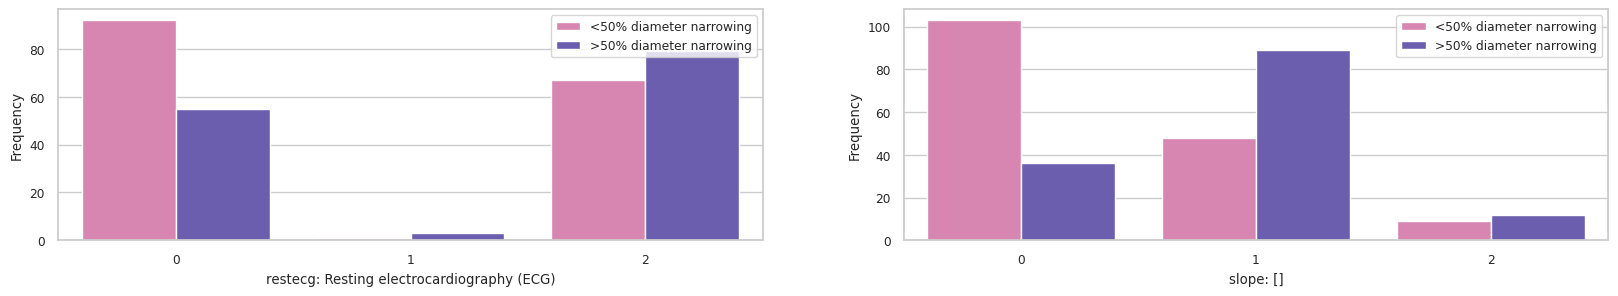

In [12]:
lst_ecg = ['oldpeak','restecg','slope','condition']
plot1count('oldpeak','oldpeak: ST Depression Relative to Rest',plt4)
plot2count('restecg','slope','restecg: Resting electrocardiography (ECG)','slope: []',plt4,[1,1])

**oldpeak**<br>
Feature `oldpeak` shows a distinct association of `>50%` to higher`oldpeak` values above 1.0 <br>
Patients w/ `<50%` tend to have an old peak of 0.0, with some slight increase possible, however very rarely above 2.0

**Resting Electrocardiography (ECG)** <br>
Most `<50%` patients have normal `ECG`, however a large portion also show probable/definite left ventricular hypertropy <br>
However a large portion of `>50%` patients also show normal `ECG`, but more are are asociated with a more probable/definite left ventricular hypertropy result.

**Slope** <br>
Upsloping tends to be associated with `<50%` patients <br>
Flat slopes are more associated with `>50%` patients <br>
Very little variation variation exists for downsloping

<br>

#### **<span style='color:#E888BB'>BLOOD RELATED FEATURES</span>**

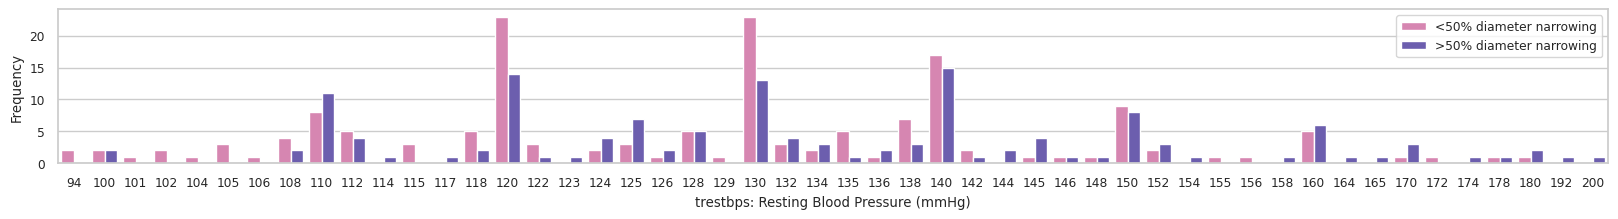

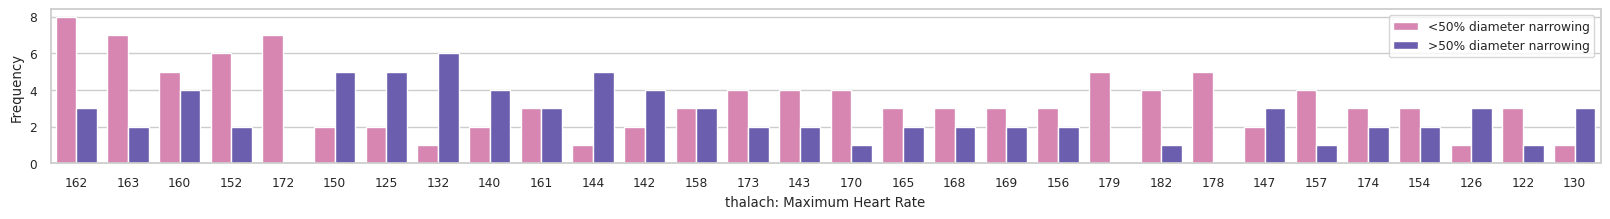

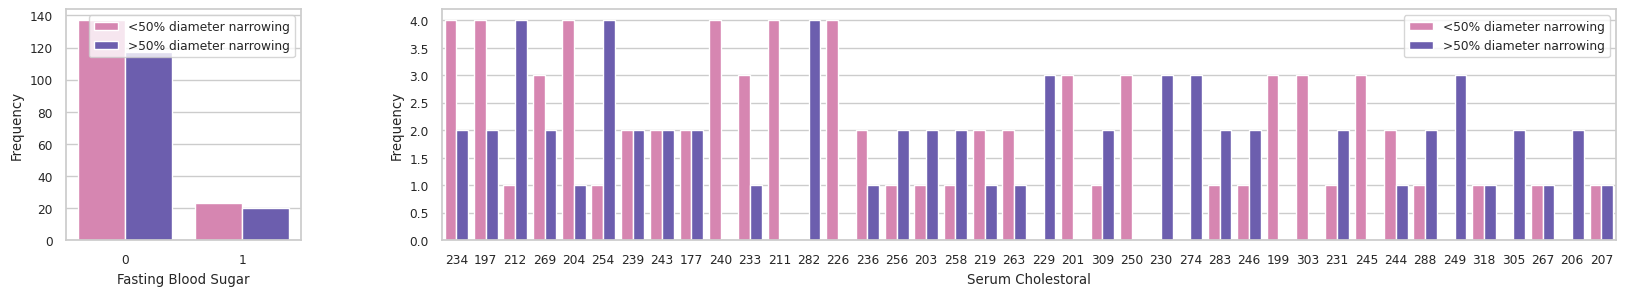

In [13]:
lst_blood = ['trestbps','thalach','fbs','chol','condition']
plot1count('trestbps','trestbps: Resting Blood Pressure (mmHg)',plt4)
plot1count_ordered('thalach','thalach: Maximum Heart Rate',df['thalach'].value_counts().iloc[:30].index,plt4)
plot2count('fbs','chol','Fasting Blood Sugar','Serum Cholestoral',plt4,[2,10],None,df['chol'].value_counts().iloc[:40].index)

**Resting Blood Pressure; Linear Correlation (0.15)**<br>
Distinctive peaks are visible in data, 110,120,130,140,150,160 mmHg; likely associated with common values. <br>
Lower pressure in the range 94-108 mmHg tends to be associated with a target `<50%` patients <br>
A rather spread out relation for `>50%` is noted, but tends to slightly favour higher values of `trestbps`, esp. 160+ mmHg

**Maximum Heart Rate, thalach; Linear Correlation (-0.42)**<br>
`>50%` cases are thus more associated with lower maximum heart rate values<br>
The histogram data shows the higher frequency cases; we note a large number of peaks for `>50%` which are quite low (125,132,144,150), `<50%` cases are more associated with higher values, 150+, indicative of the `correlation` value.

**Fasting Blood Sugar, fbs; Linear Correlation (0)**<br>
Most patients have a `fbs` below 120, but there seems no relation to `condition` for a value higher than 120.

**Serum Cholestoral, chol, Linear Correlation (0.08)**<br>
A wide range of `chol` values are measured ranging from 126 to 564.<br>
The top most common values are almost all higher than 200, which is associate with an elevated value.

#### **<span style='color:#E888BB'>NUMERICAL/CATEGORICAL DIVISION</span>**

Having revewed the features via `bivariate` histograms, we can define a `numerical/categorical` feature split: 
- Numerical Features: <code>age</code>,<code>oldpeak</code>,<code>trestbps</code>,<code>thalach</code>,<code>chol</code>
- Categorical Features: <code>sex</code>,<code>restecg</code>,<code>slope</code>,<code>fbs</code>,<code>cp</code>,<code>exang</code>,<code>thal</code>,<code>ca</code>
- As we have a few `categorical` features that have been converted into `numerical` for us, we should question whether each of the categories is weighted correctly, as they are simply ordered from 0. 
- Higher values may indicate a larger weight, which may not be correct when features are used in the model. So let's opt for a `OneHotEncoding` approach to split these `categorical features` into separate features.

In [14]:
lst_ohe_feat = ['sex','restecg','slope','fbs','cp','exang','thal','ca']
lst_ohe_out = []
for i in lst_ohe_feat:
    tdf = pd.get_dummies(df[i],i)
    lst_ohe_out.append(tdf)
    
lst_ohe_out.append(df['condition'])
df_ohe = pd.concat(lst_ohe_out,axis=1) # One Hot Encoding Features df

### <b><span style='color:#E888BB'> 2.5 |</span> Bivariate Pairgrids</b>

Pairgrids often reveal something interesting in pairwise feature relations, plotting a separate `hue` for both `condition` subsets.

In [15]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False,hue='condition',palette='Purples')
    g.fig.set_size_inches(13,13)
    g.map_upper(sns.kdeplot,n_levels=5)
    g.map_diag(sns.kdeplot, lw=2)
    g.map_lower(sns.scatterplot,s=20,edgecolor="k",linewidth=1,alpha=0.6)
    g.add_legend()
    plt.tight_layout()

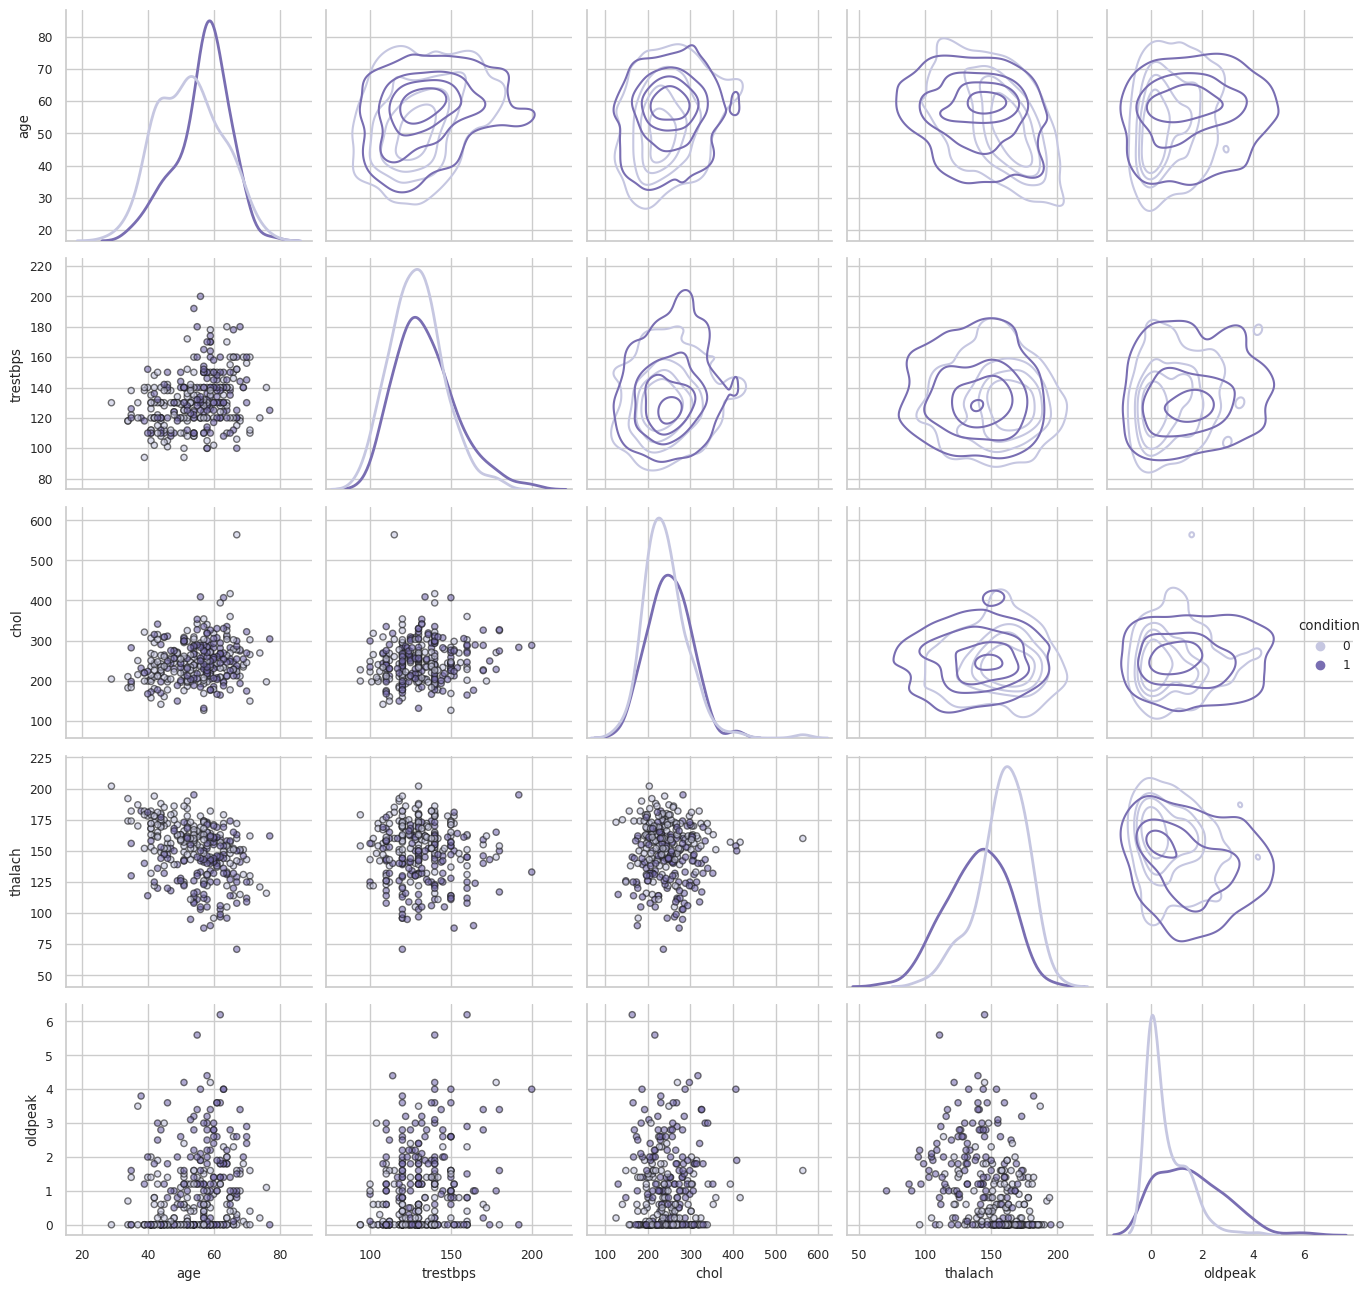

In [16]:
# We actually have only 5 continuous numerical features, the rest are categorical numbers
numvars_targ = ['age','trestbps','chol','thalach','oldpeak','condition']
snsPairGrid(df[numvars_targ])

#### **<span style='color:#E888BB'>CONDITION</span>** : `0:<50%`, `1:>50%`
- A lot of overlap in variables in the features, most notably `chol` & `trestbps` look quite similar in distribution
- `oldpeak`,`thalach`,`age` are features with most variation in target variable `condition`.

`oldpeak` is an interesting feature where a large variation in `condition` exists:
- a lot of `>50%` cases have an elevated oldpeak
- age group isn't really a factor in elevated `oldpeak` values
- `chol` levels don't seem too out of the ordinary for these elevated cases
- `thalach` levels tend to be lower, two visibles centres emerge on the KDE relation, indicating a linear relation; (

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>3 |</span></b> <b>CUSTOM MODEL CLASS</b></div>


### <b><span style='color:#E888BB'> 3.1 |</span> Gaussian Process Classifier </b>

- The <b>GPRC()</b> class contains a very simplistic classification addition to the <b>Regressor</b> model based on the closest distance to each class. <br>
The GP model has the ability to accurately adapt to data it is provided in a high dimensional space. How the model behaves is dependent on its <b>hyperparameter</b> selection: 
- Each <b>hyperparameter</b> has it's own role in how it changes the model, with its core being the <b>covariance matrix</b>; defining all of the instance relation weights in a neat matrix format. <b>Multiple</b> covariance matrices have to be constructed to make a prediction, including matrix inversions, yet GP is the cheaper variant of all models associated with it. <br><br>

#### **<span style='color:#E888BB'>MODEL HYPERPARAMETERS</span>** `theta`,`sigma`,`sigma_n`

- Two `hyperaparameters` are associated with the `covariance function` (`kernel` if you prefer); `theta` & `sigma`, this function is used to define all weights in the `covariance matrix`. These functions are used in both `variance` & `covariance` parts of the `covariance matrix`. These functions can be set in whatever combination suits your problem.
- The last, `sigma_n` is a hyperparameter associated with the diagonal term in the `covariance matrix`, influencing the `variance` component only. Implying how relevant the training nodes are; (noise/noiseless) assumption.
    
#### **<span style='color:#E888BB'>MODEL INSTANTIATION OPTIONS</span>** `__init__`

**Hyperparameters** <br>
- `self.theta` is the `covariance function` associated `hyperparameter`, similar for the other two. 
- `__init__` sets the parameters to a default value (`theta=10`,`sigma=10`,`sigma_n=0.01`) if not set; GPR(). 
- You can set them manually GPRC(theta=1,sigma=1,sigma_n=0.01,opt=False), but `opt=False` must be present to prevent `hyperparameters` to be overwritten. <br>

**Other options**
- `self.opt` is the previously mentioned activator for `objective function` optimisation.
- `GPRC.kernel` is a common class variable of GPR, defining the type of `covariance function` used.
- `self.mu_in` is an import for previously calculated posterior mean predictions 
- `self.se_alp` is the ensemble coefficient (current prediction multiplier)
- `self.se_bet` is the ensemble coefficient (imported prediction multiplier)

#### **<span style='color:#E888BB'>TRAINING THE GPRC() MODEL</span>** `.fit(X,y)`
- Setting `hyperparameters` & calculating the training <b>covariance matrix</b>` self.Kmat`
- Specific to the `classifier`, all unique target values are defined
- Hyperparameters can be both set in the manner outlined above, or tuned based on a specific `objective function`. 
- Various `objective functions` exist, the full `likelihood` & simplified variant is included, 
- Scipy's `optimize.minimize` class is used together with the `L-BFGS-B` approach to find the minimum.

#### **<span style='color:#E888BB'>MAKING A PREDICTION USING GPRC() MODEL</span>** `.predict(X)`
- The `Covariance Matrix` for Training & Test Feature Matrices needs to be calculated.
- Commonly referred to as the `posterior mean` is the main model prediction output.
- Specific to the `classifier`, the nearest class to each prediction is found.

#### **<span style='color:#E888BB'>SKLEARN DEFAULT EVALUATION METRIC</span>** `.score()`
- When using <code>ClassifierMixin</code> in an sklearn compatible class, the default metric when calling <b>.score</b> in our <b>pipelines</b> and <b>evaluations</b> will be <b>accuracy</b>.

### <b><span style='color:#E888BB'> 3.2 |</span> Validation Dataset </b>

Lets see if we have everything in order, by doing a simple classification using our custom model

In [17]:
''' Sample Usage for GPRC() '''
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier as DC
iris = load_iris();X = iris.data;y = iris.target 
model = DC(strategy="most_frequent");model.fit(X,y);print(f'DC(): {model.score(X,y).round(2)}')
model = GPRC();model.fit(X,y);print(f'GPRC(): {model.score(X,y)}')

DC(): 0.33
GPRC(): 0.98


In [18]:
''' Draw a single Heatmap using Seaborn '''
def heatmap1(values,xlabel,ylabel,xticklabels,yticklabels,
             cmap='plasma',vmin=None,vmax=None,fmt="%0.2f",title=None):

    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(values, ax=ax,cmap=cmap,cbar=True)
    
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
    ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_title(title)
    ax.set_aspect(1)
    
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
        
''' Plot Several Seaborn Heatmaps Side by Side '''
def heatmapn(n,values,labels,ticklabels,titles,
              cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

    ii=-1
    fig,ax = plt.subplots(1,n,figsize=(15,5))
    for i in range(0,n):
        ii+=1
        tval = values[ii];ttitle = titles[ii]
    
        sns.heatmap(tval,ax=ax[ii],cmap=cmap,cbar=True) 
        img = ax[ii].pcolor(tval, cmap=cmap, vmin=vmin, vmax=vmax)
        img.update_scalarmappable()
        ax[ii].set_xlabel(labels[0]);ax[ii].set_ylabel(labels[1])
        ax[ii].set_xticks(np.arange(len(ticklabels[0])) + 0.5)
        ax[ii].set_yticks(np.arange(len(ticklabels[1])) + 0.5)
        ax[ii].set_xticklabels(ticklabels[0]);ax[ii].set_yticklabels(ticklabels[1])
        ax[ii].set_title(ttitle)
        ax[ii].set_aspect(1)
    
        # color of each matrix content
        for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.mean(color[:3]) > 0.5:
                c = 'k'
            else:
                c = 'w'
            ax[ii].text(x, y, fmt % value, color=c, ha="center", va="center")

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>4 |</span></b> <b>HEART DISEASE CLASSIFICATION MODELS</b></div>

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>FEATURE ENGINEERING</span></b></p></div>

- We have a quite a lot of features we can look into when building a model that predicts `condition`
- EDA revealed our features can be split in a few subgroups, let's investigate whether it's possible to build models based on `ECG`,`Blood`,`Patient Features` alone, as well as a mixture of them. The original dataset `categorical` featuers are used.
- EDA also revealed our `numerical` features do contain converted `categorical` features, implying they have been allocated a specific value starting from zero. These values can be misinterpreted by the model, thus `OHE` will be employed. If `OHE` shows an improvement, it's likely the `standard` feature allocation for categorical values is negatively affecting the model performance.
- Previously outlined, `GP` is significantly prone to overfitting, it's very easy to get a very high scores on training data, but have very poor test data accuracy. So a decent model should have similar accuracy on all tested data.
- All models are built on the assumption; `sigma_n=0.01`

<br>

### <b><span style='color:#E888BB'> 4.1 |</span> ECG feature based model </b>
    

- EDA investigation into ECG features revealed they have a good mix of `correlation` values to the target variable `condition`; `restecg(0.17)`,`oldpeak(0.42)`,`slope(0.33)`.
- Let's investigate if it's viable to implement `condition` prediction based on subset feature data
- Then, since we have a few features, we can incorporate `PolynomialFeatures()` of a high order without drastically increasing the computational cost, `StandardScaler()` as well is added in the `Poly()` Pipeline.

#### **<span style='color:#E888BB'>GPC MODEL /W GRIDSEARCHCV (MANUAL THETA,SIGMA)</span>**
The assumption is that the our data has a relatively low noise level & training data are with minimal errors, `sigma_n=0.01`

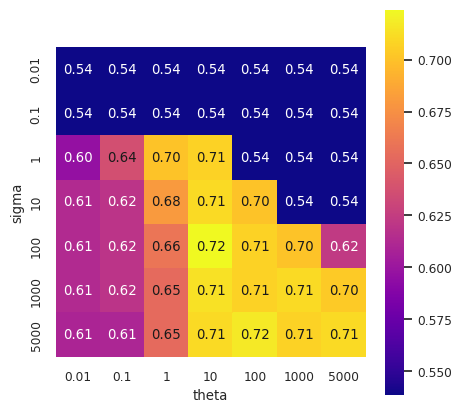

In [19]:
from sklearn.model_selection import GridSearchCV,cross_val_score

lst_theta = [0.01, 0.1, 1, 10, 100, 1000, 5000]
lst_sig = [0.01, 0.1, 1, 10, 100, 1000, 5000]

def modelEval(ldf,lst_theta,lst_sig,feature='condition'):

    # Given a dataframe, split feature/target variable
    X = ldf.copy()
    y = ldf[feature].copy()
    del X[feature]
    
    # define parameters for gridsearch (theta,sigma)
    param_grid = {'theta': lst_theta,'sigma': lst_sig}
    
    # split dataset into 5 segments, fit & predict fo each segment
    model = GPRC(opt=False)  # manual hyperparameter model
    model.fit(X,y)

    gscv = GridSearchCV(model,param_grid,cv=5) # 5 fold CV
    gscv.fit(X.values,y.values)
    results = pd.DataFrame(gscv.cv_results_) 
    scores = np.array(results.mean_test_score).reshape(7,7)
    
    # plot the cross validation mean scores of the 5 fold CV
    heatmap1(scores,xlabel='theta',xticklabels=param_grid['theta'],
                    ylabel='sigma',yticklabels=param_grid['sigma'])
    
ldf1 = df[lst_ecg] # subset of ecg features
modelEval(ldf1,lst_theta,lst_sig)

#### **<span style='color:#E888BB'>GPC MODEL /W GRIDSEARCHCV (MANUAL THETA,SIGMA) + POLYNOMIALFEATURES()</span>**
Additional to the previous assumption, effects of `PolynomialFeatures()` of 2nd & 7th order are investigated in a `Pipeline()` w/ `StandardScaler()`.

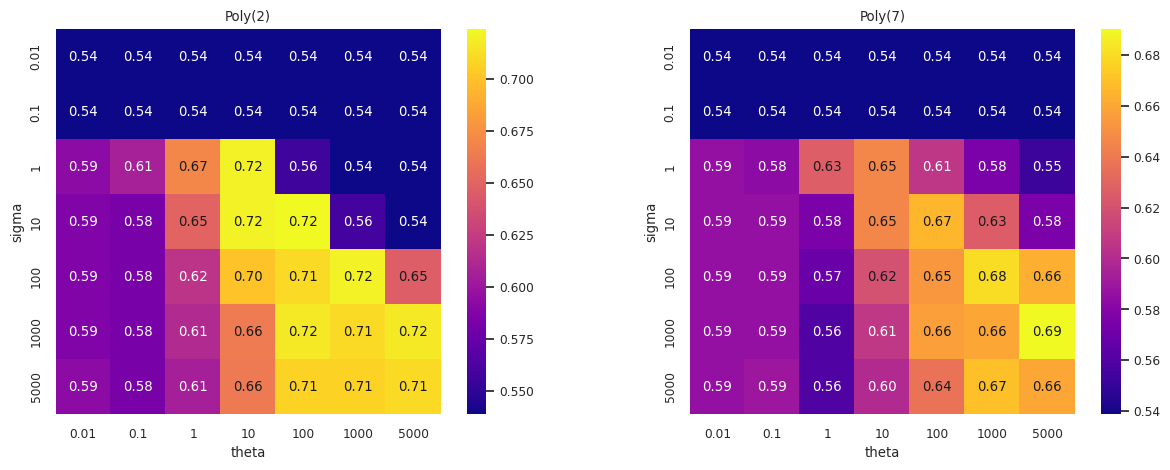

In [20]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

lst_theta = [0.01, 0.1, 1, 10, 100, 1000, 5000]
lst_sig = [0.01, 0.1, 1, 10, 100, 1000, 5000]

# Model Evaluation Function for Polynomial Feature Pipeline
def modelEval2(ldf,lst_theta,lst_sig,feature='condition'):

    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    tlst = []
    for i in [2,7]:
    
        # create a pipeline combining a polynomial feature 
        pipe = Pipeline(steps=[('scaler',StandardScaler()),
                               ('poly',PolynomialFeatures(i)),
                               ('model',GPRC(opt=False))])

        # pipepines require slightly different notations w/ __
        param_grid = {'model__theta': lst_theta,'model__sigma': lst_sig}

        gscv2 = GridSearchCV(pipe,param_grid,cv=10)
        gscv2.fit(X,y)
        ypred = gscv2.predict(X)
        results2 = pd.DataFrame(gscv2.cv_results_)
        scores2 = np.array(results2.mean_test_score).reshape(7,7)
        tlst.append(scores2)
    
    lst_lab = ['theta','sigma'];lst_tit = ['Poly(2)','Poly(7)']
    lst_tick = [param_grid['model__theta'],param_grid['model__sigma']]
    
    # Plot two Heatmaps side by side for the two Polynomial
    heatmapn(n=2,values=tlst,labels=lst_lab,ticklabels=lst_tick,titles=lst_tit)

modelEval2(ldf1,lst_theta,lst_sig)

#### **<span style='color:#E888BB'>GPC MODEL (THETA=10,SIGMA=100) /W TRAIN_TEST_SPLIT</span>**
Having conducted a cross validation, let's determine the score for a 70/30 split using `theta=10`,`sigma=100`

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def modelEval3(ldf,hyp,pred_upd,feature='condition'):

    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=73)

    lst_mu = []
    if(pred_upd!=None):
        model = GPRC(theta=hyp[0],sigma=hyp[1],opt=False,mu_in=pred_upd)
    else:
        model = GPRC(theta=hyp[0],sigma=hyp[1],opt=False)

    model.fit(X_train,y_train)
    model.predict(X_train.values);lst_mu.append(model.mu_s)
    model.predict(X_test.values);lst_mu.append(model.mu_s)
    print(f'Training Score: {model.score(X_train.values,y_train.values)}')
    print(f'Test Score: {model.score(X_test.values,y_test.values)}')
    
    if(pred_upd==None):
        return lst_mu
            
lst_ldf1 = modelEval3(ldf1,hyp=[10,100],pred_upd=None)

Training Score: 0.7391304347826086
Test Score: 0.7222222222222222


#### **<span style='color:#E888BB'>SUMMARY - ECG MODELS</span>**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>ECG features whilst being important, don't seem like the only features that are needed to create a reasonable model for the prediction of target variable condition. The addition of more features will likely improve the model</li>
    <li>The ECG feature model reached only a peak mean cross validation score of 0.72 using 10-fold CV</li>
    <li>The addition of polynomial features didn't improve the model</li>
    <li>Standard train_test_split resulted in a very similar training and test scores (0.74,0.72)</li>
</ul>
</div>

### <b><span style='color:#E888BB'> 4.2 |</span> Blood related feature model </b>


- Features `trestbps`,`thalach`,`fbs`,`chol` are available relating to blood samples, let's use the previously used function `modelEval` to build a basic `CrossValidationCV` model using them.
- Let's also try a simple `ensemble` approach, using the exported `posterior mean` from the `ECG` model & import it into the new model. 
- Like ECG, the correlation of various associated features is quite widespread, not too low or highly correlated to target variable, `condition`, so perhaps we might get a better model.

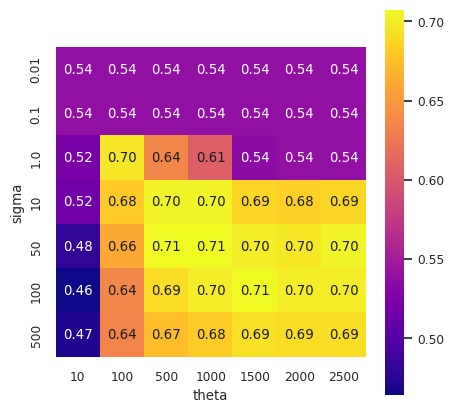

In [22]:
''' Cross Validation '''
lst_theta = [10,100, 500, 1000, 1500, 2000, 2500]
lst_sig = [0.01,0.1,1.0,10,50,100, 500]

ldf2 = df[lst_blood]
modelEval(ldf2,lst_theta,lst_sig)

In [23]:
''' Train/Test Split w/  '''
lst_ldf2 = modelEval3(ldf2,hyp=[1000,50],pred_upd=None)

Training Score: 0.6956521739130435
Test Score: 0.6888888888888889


In [24]:
''' Ensemble Modification Train/Test Split'''
# lst_ldf1 : ECG based model prediction
modelEval3(ldf2,hyp=[1000,50],pred_upd=lst_ldf1)

Training Score: 0.7391304347826086
Test Score: 0.7666666666666667


#### **<span style='color:#E888BB'>SUMMARY - BLOOD RELATED FEATURE MODEL</span>**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>The standalone Blood Related Feature Model did slightly worse than the ECG model created earler</li>
    <li>Optimal values of theta lie slightly higher than the previous model, whilst sigma was roughtly idential to the previous model</li>
    <li>An ensemble approach, using the ECG model output was used in the input of the  Blood Related Model, which resulted in the highest model score up to now (0.76)</li>
</ul>
</div>

### <b><span style='color:#E888BB'> 4.3 |</span> Patient related + ECG feature model </b>


`Age` & `Sex` are interesting features which may add value to the model, but not enough by itself. The two features are added to the ECG feature model features to create a new model.

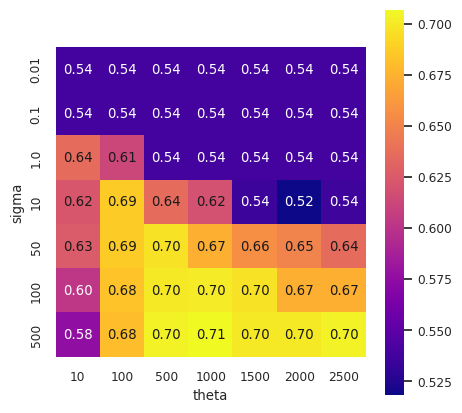

In [25]:
lst = ['age','sex'] 
ldf3 = df[lst+lst_ecg]
modelEval(ldf3,lst_theta,lst_sig)

#### **<span style='color:#E888BB'>SUMMARY - PATIENT + ECG RELATED FEATURE MODEL</span>**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>Age & Sex didn't actually seem to add anything to improve the ECG model
</li>
</ul>
</div>

<br>

### <b><span style='color:#E888BB'> 4.4 |</span> Feature type based models </b>


- Now having built a few models based on the original feature matrix encoding for `categorical` feaures (0 onwads), we can see that there tends to be a limit beyond which it's a little difficult to exceed. Even `scaling` has little to no impact as implemented in a `PolynomialFeature()` pipeline.

- We have two sets of feature types; `numerical` and `categorical`. `Categorical` features were applied a OHE modification, creating new feautres for every unique feature case. The two models are evaluated individually & ensemble approach is attempted.

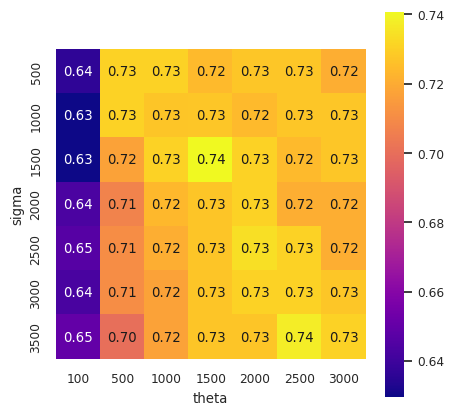

In [26]:
''' Numerical Features Model '''
lst_theta = [100, 500, 1000, 1500, 2000, 2500,3000]
lst_sig = [500,1000,1500,2000,2500,3000,3500]

df_num = df[numvars_targ].copy()
modelEval(df_num,lst_theta,lst_sig)

In [27]:
lst_ldf3 = modelEval3(df_num,hyp=[1500,1500],pred_upd=None)

Training Score: 0.7584541062801933
Test Score: 0.7333333333333333


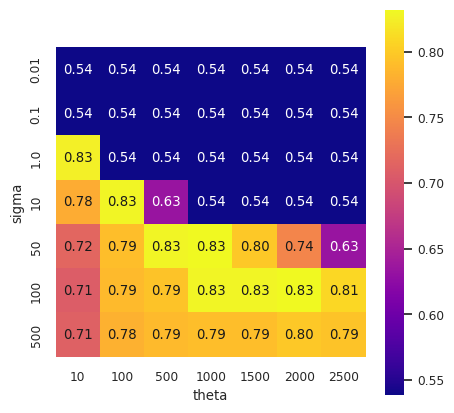

In [28]:
''' Categorical Feature Model '''
lst_theta = [10,100, 500, 1000, 1500, 2000, 2500]
lst_sig = [0.01,0.1,1.0,10,50,100, 500]
modelEval(df_ohe,lst_theta,lst_sig)

In [29]:
''' Ensemble Modification of Categorical Feature Model ''' 
modelEval3(df_ohe,hyp=[100,50],pred_upd=lst_ldf3)

Training Score: 0.8599033816425121
Test Score: 0.8888888888888888


#### **<span style='color:#E888BB'>SUMMARY - FEATURE BASED MODELS</span>**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>The numerical feature only, consisting of a mixture of various feature types performed very similar to other tested models, peaking at a cross validation mean score of 0.74</li>
    <li>The OHE categorical feature set was more promising, consistenly scoring over 0.83, which is the best individual subgroup model so far</li>
    <li>Both Training/Test sets perform relatively similar, even with the ensemble posterior prediction adjustment, which is encouraging</li>
    <li>Cross Validation outlined various hyperparameters that give a mean cv score of 0.83, all of which give slightly different outcomes on train/test split, ranging from roughtly 0.8 to 0.89 for the test set, which seems to benefit the most from ensembling</li>

</ul>
</div>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>5 |</span></b> <b>CONCLUDNG REMARKS</b></div>

- In this problem, we looked at tackling the updated **[UCI Heart Disease](https://www.kaggle.com/cherngs/heart-disease-cleveland-uci)** datase, which corrects some mistakes in the originally posted dataset.
- In this notebook, we looked at a simple way of turning a <b>regressor</b> into a basic <b>classifier</b>, which makes it compatible with <b>GridSearchCV</b>, <b>Pipeline</b> & <b>Score</b> functions & by default our evaluation results are all <b>accuracy</b> evaluations. 
- A <b>true classifier</b> would require some additional reworking in terms of class structure, nevertheless it was quite an interesting experiment, seeing whether a regressor right out of the box would work as a simple classifier. 
- No real surprise, even a <b>simple ensemble</b> of multiple models resulted in the highest <b>accuracy</b> of 0.89, which was nice.
- Overall we can see that with a viable cross validation method, Gaussian Process models are more than capable models, like with tree based models, we need to select hyperparameters which wont overfit the training dataset.